In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('C:/Users/culle/Documents/bills/bill_1.csv')

In [3]:
df.head()

,time,cost
0,2022/6/1,0.568931
1,2022/6/2,0.178928
2,2022/6/3,0.179040
3,2022/6/4,0.222726
4,2022/6/5,0.222719


In [4]:
df['time'].nunique()

392

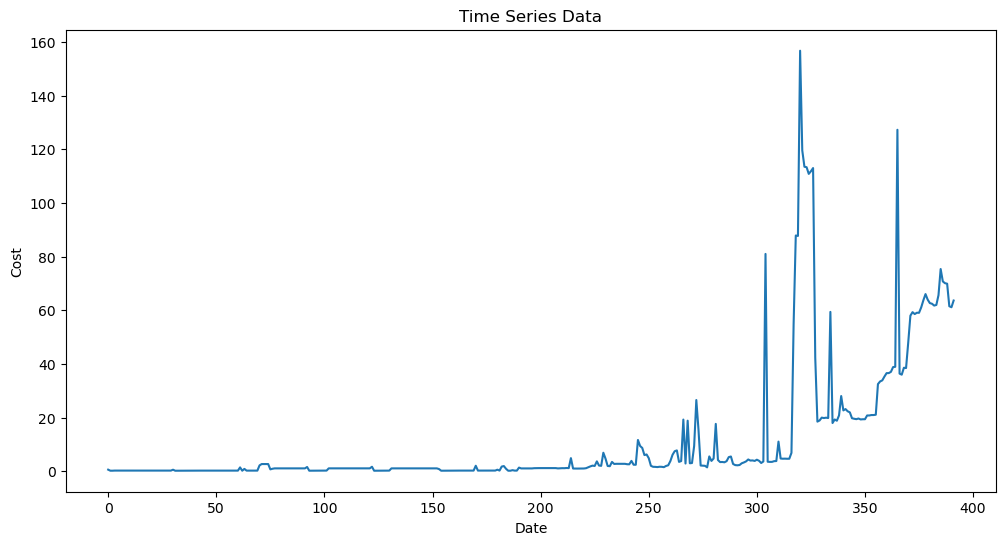

In [5]:
#visualizing data
df['cost'].plot(figsize = (12,6))
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.show()

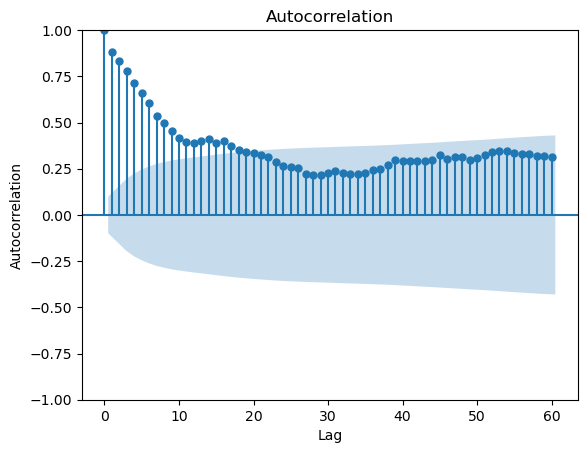

In [6]:
# Plot autocorrelation function (ACF)
#it tells you about the correlation between series and ts lagged values, you can see presence of trends 
#and correlation patterns
plot_acf(df['cost'], lags=60)  # Adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [7]:
#find the differencing order, technique to remove trends or non-stationary in a time series graph
result = adfuller(df['cost'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.5993517761731455
p-value: 0.48391908779794657


C:\Users\culle\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


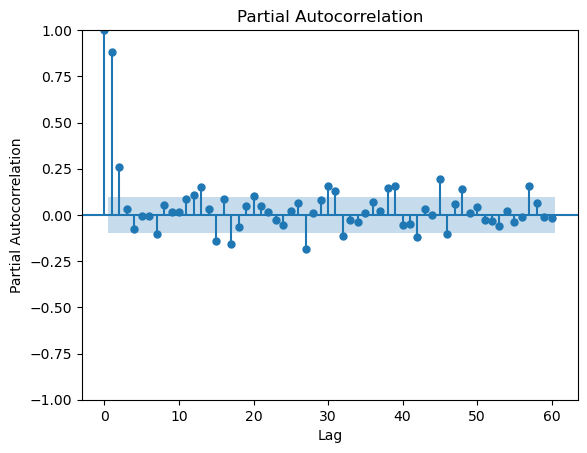

In [8]:
# Plot partial autocorrelation function (PACF)
plot_pacf(df['cost'], lags=60)  # Adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [9]:
#Fit the ARIMA model, adjust order accordingly, order = (p,d,q)
#p,q is found from the partial autocorrelation and autocorrelation function outliers, 
#also look for cutoff points in the chart
#d is the differencing order, ex. quadratic, linear, or constant relationship
model = ARIMA(df['cost'], order=(0,3, 4))
results = model.fit()

C:\Users\culle\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [10]:
#forecast 365, or 1 year ahead, can change number accordingly
forecast = results.get_forecast(steps=120)
forecasted_data = forecast.predicted_mean

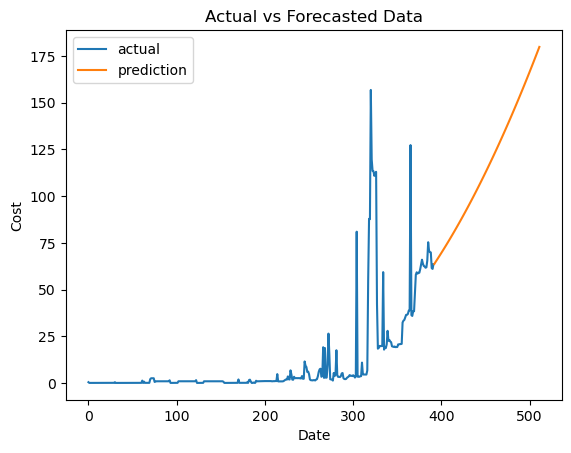

In [11]:
#visualize the forecasts, the forecast will give a prediction on the cost, the longer away from the actual time, 
#the less it deviates from mean, as you can tell if you increase the time in the box above
plt.plot(df.index,df['cost'],label = 'actual')
plt.plot(forecasted_data.index,forecasted_data,label = 'prediction')
plt.title('Actual vs Forecasted Data')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend()
plt.show()